# 03 Surface normal

* 구 표면의 법선 벡터(normal vector)를 계산하고 색상으로 변환해 렌더링 합니다.

In [1]:
import numpy as np
import numpy.linalg as LA

import matplotlib.pyplot as plt

In [2]:
def normalize(vec: np.array, eps: float = 1e-6):
  return vec / (LA.norm(vec) + eps) 

def blend(color1: np.array, color2: np.array, t: float):
  return (1.0 - t)*color1 + t*color2

In [3]:
class Ray:
  def __init__(self, origin: np.array, direction: np.array) -> None:
    self.origin: np.array = origin    
    self.direction: np.array = normalize(direction)

  def at(self, t: float) -> np.array:
    return self.origin + t*self.direction

* 구 표면의 법선 벡터 계산
  * Ray가 구와 만나는 경우 $t$를 계산합니다.
    * 카메라의 시작점에서 가까운 점을 계산하가 위해 아래의 근을 사용합니다.
$$t = \frac{-h - \sqrt{h^2 - ac}}{a}$$
  * 구의 중심 $\mathbf{C}$에서 구 표면의 점 $\mathbf{P}(t)$으로 향하는 벡터를 계산합니다. 

<center>
<img src="./images/surface_normal.png" width="500px" height="500px" title="broadcasting"/>
</center>

In [4]:
def hit_sphere(center: np.array, radius: float, ray: Ray):
  dir_center_to_origin = ray.origin - center
   
  a = np.dot(ray.direction, ray.direction)
  half_b = np.dot(dir_center_to_origin, ray.direction)   
  c = np.dot(dir_center_to_origin, dir_center_to_origin) - radius**2.0

  discriminant = half_b**2 - a*c
  if discriminant < 0:
    return -1.0
  else:    
    return (-half_b - np.sqrt(discriminant)) / a

* 계산된 법선 벡터는 정규화(normalize)합니다.
* 렌더링 할 때의 색을 위해 값을 0.5 ~ 1.0으로 변환합니다.

In [5]:
def ray_color(ray: Ray) -> np.array:
  sphere_center = np.array([0, 0, -1])
  t = hit_sphere(center=sphere_center, radius=0.5, ray=ray)  

  if t > 0.0:
     N = normalize(ray.at(t) - sphere_center)
     return 0.5 * (N + 1.0)

  t = 0.5 * (ray.direction[1] + 1.0)
  color1 = np.array([1.0, 1.0, 1.0])
  color2 = np.array([0.5, 0.7, 1.0])
  return blend(color1=color1, color2=color2, t=t)

In [6]:
# image
aspect_ratio = 16.0 / 9.0
image_height = 200
image_width = int(aspect_ratio * image_height)

image = np.zeros([image_height, image_width, 3])

In [7]:
# camera
viewport_height = 2.0
viewport_width = aspect_ratio * viewport_height
focal_length = 1.0

camera_origin = np.array([0.0, 0.0, 0.0])
horizontal_vec = np.array([viewport_width, 0.0, 0.0])
vertical_vec = np.array([0.0, viewport_height, 0.0])
frontal_vec = np.array([0.0, 0.0, focal_length])
lower_left_corner = camera_origin - horizontal_vec/2.0 - vertical_vec/2.0 - frontal_vec

In [8]:
%%time

for row in range(image_height):
  for col in range(image_width):
    u = float(col) / (image_width - 1)
    v = float(row) / (image_height - 1)

    ray = Ray(origin=camera_origin,
              direction=(lower_left_corner + u*horizontal_vec + v*vertical_vec) - camera_origin)
    
    image[row, col] = ray_color(ray)

CPU times: user 1.96 s, sys: 20.1 ms, total: 1.98 s
Wall time: 2 s


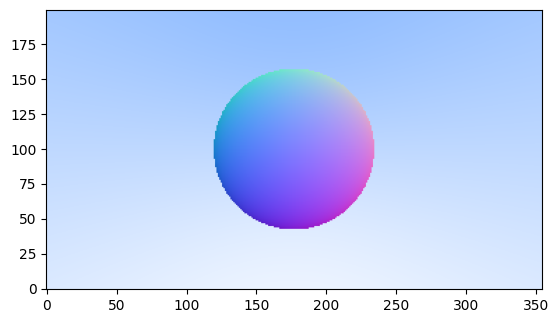

In [9]:
plt.imshow(image, origin='lower')
plt.show()